#Netflix Data Analysis
Python Data Analysis Project



**Introduction**

Netflix, a pioneer in streaming media and entertainment services, has fundamentally transformed the way
people consume content worldwide. Founded in 1997 as a DVD rental company, it transitioned to streaming in 2007 and rapidly grew to become a global leader, boasting a vast library of movies, TV
shows, and documentaries. With millions of subscribers across more than 190 countries, Netflix offers content in multiple languages and caters to diverse cultural and demographic preferences. This growth
reflects the industry-wide shift from traditional television to on-demand streaming services, driven by an increasing reliance on digital media.

**Industry Scope**

The streaming industry has witnessed exponential growth over the last decade, disrupting the traditional media landscape. This shift has empowered viewers with greater flexibility and choice, and has encouraged
other entertainment companies to enter the streaming market. As a result, platforms like Hulu, Amazon Prime Video, and Disney+ are constantly competing for viewer attention. Netflix’s unique advantage lies in
its vast content catalog, which spans various genres, languages, and countries, and its investment in original productions, which have garnered critical acclaim and a loyal following.

**Purpose of the Analysis**

This analysis aims to explore the content trends, regional preferences, and demographic targeting strategies of Netflix over the years. By examining content types, distribution across countries, genre popularity,
release trends, and duration metrics, we can gain insights into how Netflix curates and expands its catalog to meet evolving viewer demands. The findings could provide valuable information for strategic decisions
regarding content development, localization, and audience targeting.

**Dataset Overview**

The dataset comprises 7,787 rows and 12 columns, each providing information about individual Netflix titles, such as their category, country of origin, and year of release.

#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   #visualizating missing data
import warnings
warnings.filterwarnings("ignore")

#Set up visualization ethics and theme
primary = '#d32f2f'
secondary = '#000000'

sns.set_theme(style = 'whitegrid')
sns.set_palette(sns.color_palette([primary,secondary]))
plt.rcParams['figure.figsize'] = (10, 6)

#Load the Dataset

In [3]:
data = pd.read_csv('/content/netflix.csv')

#Structure of the data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Basic Information

In [4]:
#Total no of Rows and Columns
data.shape

(8807, 12)

In [5]:
#data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<Axes: >

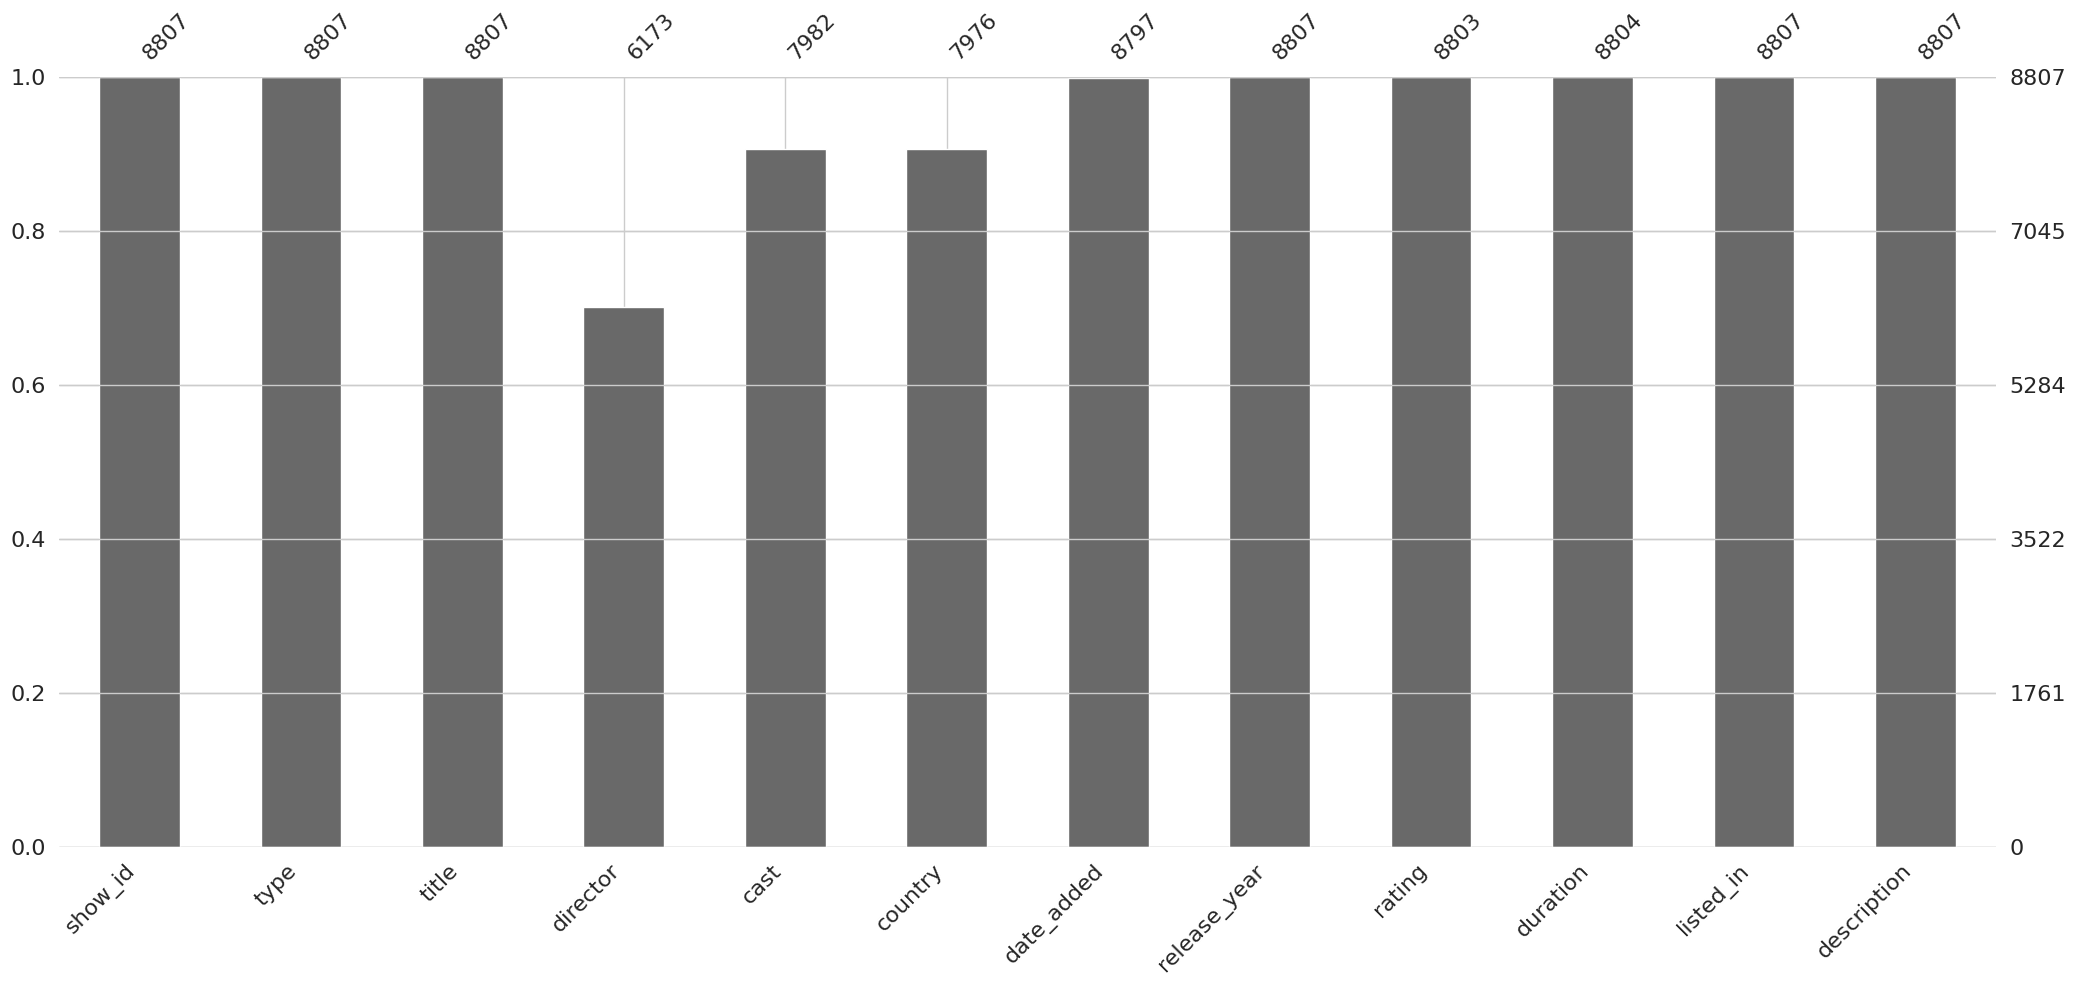

In [6]:
#visualize Missing value
msno.bar(data)


<Axes: >

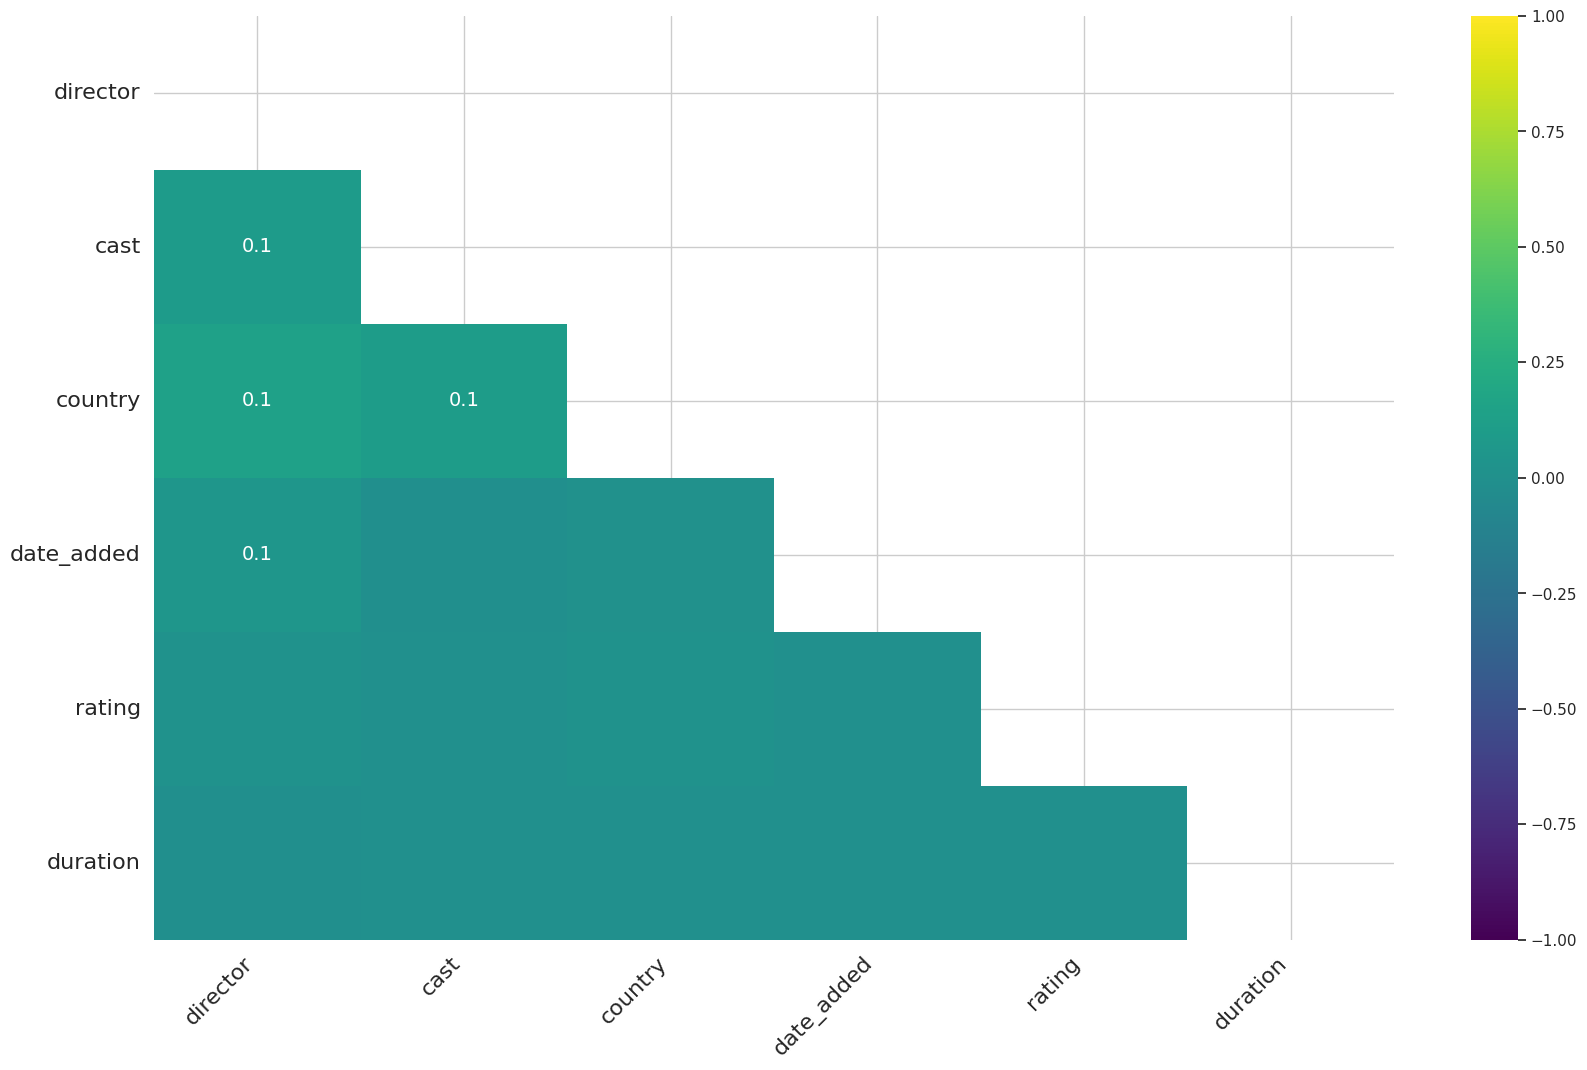

In [7]:
msno.heatmap(data, cmap = 'viridis')

In [8]:
#Handle Missing values
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
data['director'].fillna('Unknown', inplace = True)
data['cast'].fillna('Unknown', inplace = True)
data['country'].fillna('Unknown', inplace = True)
data['rating'].fillna('Unknown', inplace = True)

data['date_added'].fillna(data['date_added'].mode()[0], inplace = True)
data['duration'].fillna(data['duration'].mode()[0], inplace = True)

In [10]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [11]:
#duplicate Values
print(f"Total Duplicates: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

Total Duplicates: 0


In [12]:
#Summary Statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


#Insights and Analysis

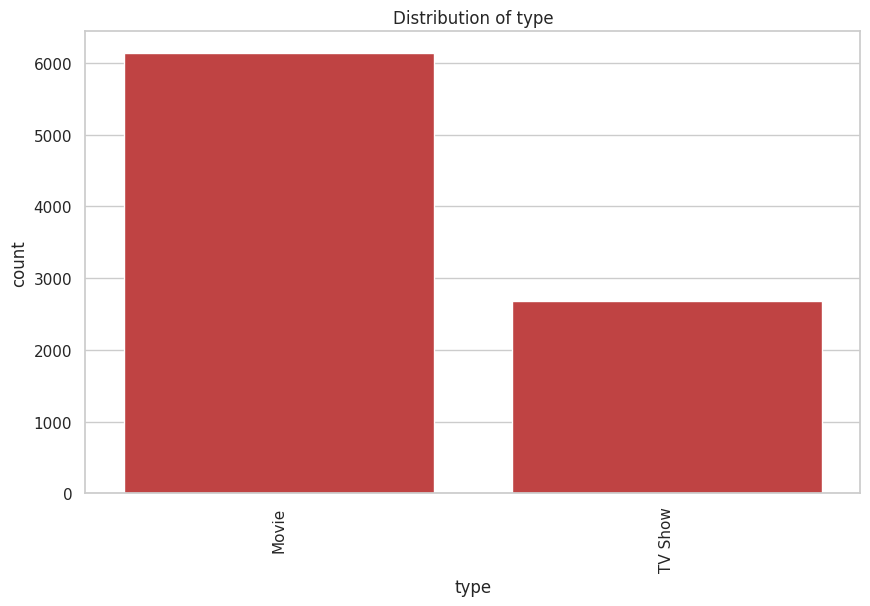

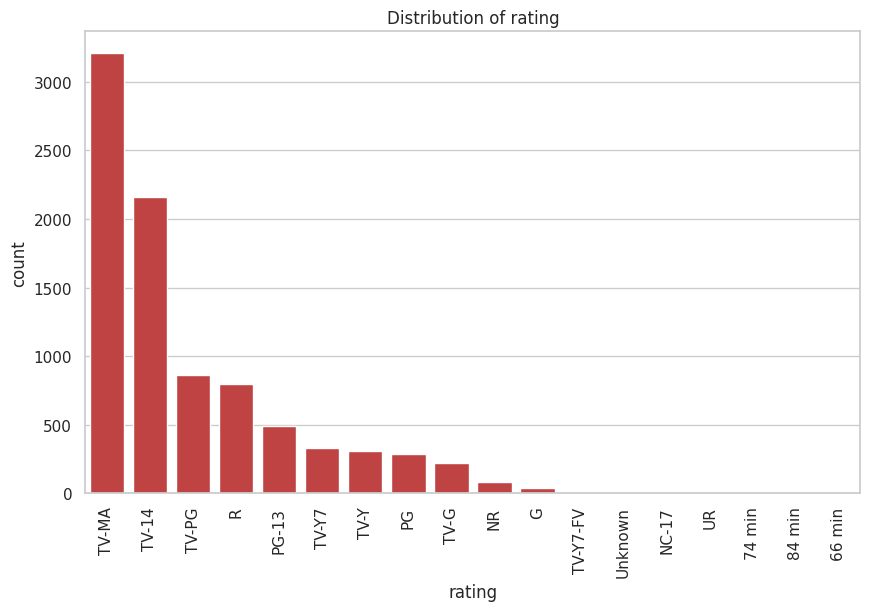

In [14]:
#Univariate: Categorical Column

cat = ['type', 'rating']

for c in cat:
  sns.countplot(data = data, x = c, order=data[c].value_counts().index)
  plt.title(f"Distribution of {c}")
  plt.xticks(rotation=90)
  plt.show()

# Content Distribution

In [15]:
type_count = data['type'].value_counts()
print(type_count)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [16]:
#Pie chart for content distribution
import altair as alt

df = {'type': ['Movie', 'TV Show'], 'count': [6131, 2676]}
df = pd.DataFrame(df)

#Calculate Percentage
df['Percent'] = (df['count'] / df['count'].sum())*100

primary = '#d32f2f'
secondary = '#000000'


custom = alt.Scale(
    domain=['Movie', 'TV Show'],
    range=[primary, secondary]
)

#Pie Chart
fig = alt.Chart(df).mark_arc().encode(
    theta=alt.Theta(field='Percent', type='quantitative'),
    color=alt.Color(field='type', type='nominal', scale=custom, legend=alt.Legend(title='Type')),
    tooltip=[
        alt.Tooltip('type', title='Type'),
        alt.Tooltip('Percent', title='Percent', format='.2f'),
        alt.Tooltip('count', title='Count')
    ]
).properties(
    title='Content Distribution by Type'
)

fig

alt.Chart(...)

#Content by Country (top 10)

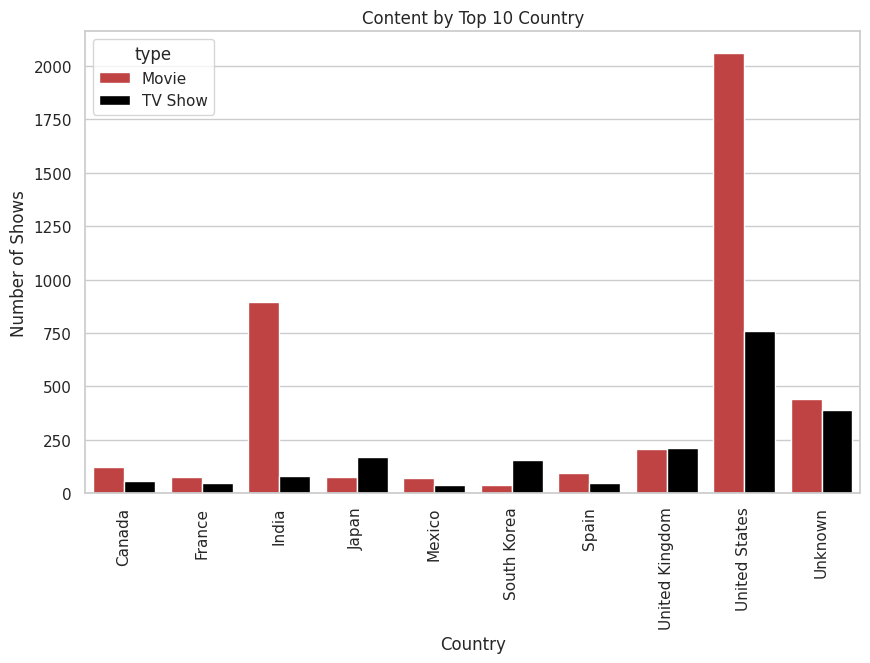

In [17]:
topCountry = data['country'].value_counts().head(10).index
topCountry_filter = data[data['country'].isin(topCountry)]
Count_Type = topCountry_filter.groupby(['country','type']).size().reset_index(name='count')
Count_Type

#BarPlot
ax = sns.barplot(x='country', y= 'count', hue='type', data = Count_Type)
ax.set_title('Content by Top 10 Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Shows')
plt.xticks(rotation=90)
plt.show()

# Content Added over Time

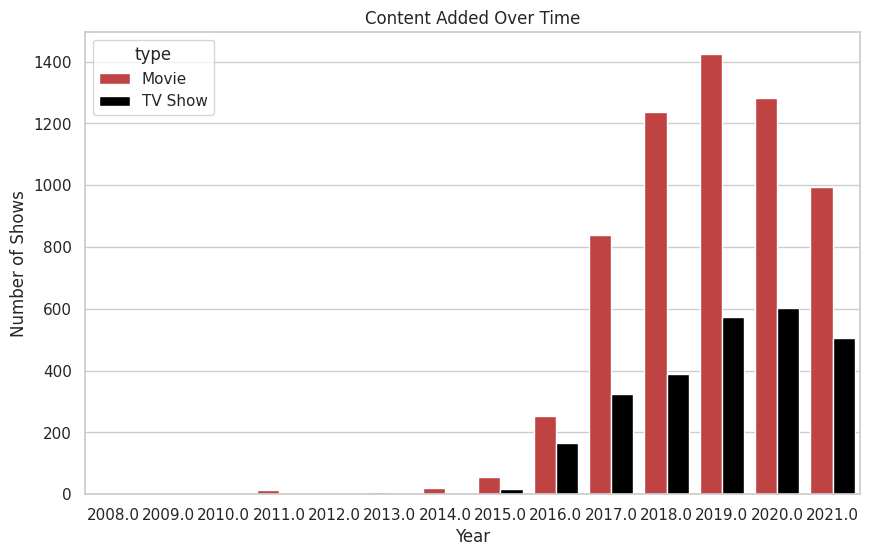

In [18]:
data['Year'] = pd.to_datetime(data['date_added'], errors='coerce').dt.year


#Countplot
sns.countplot(data=data, x='Year', hue='type')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()

#Distribution of Duration

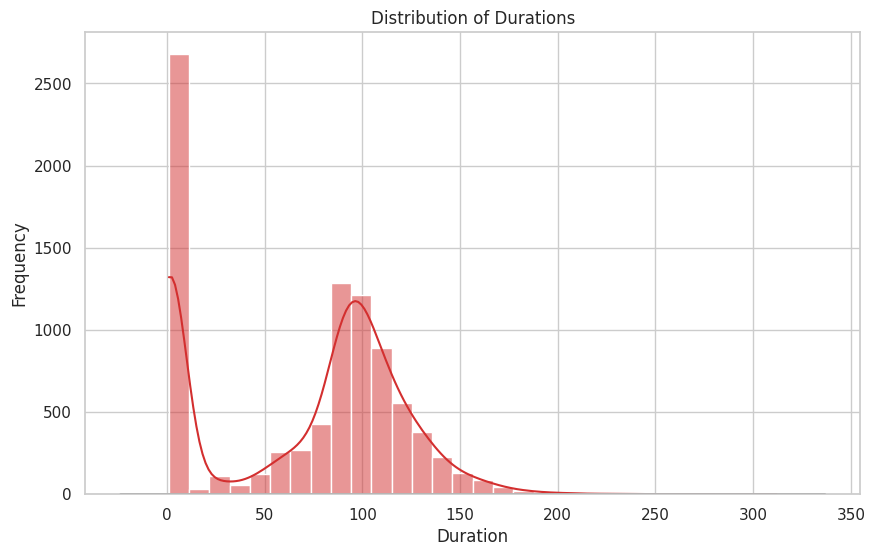

In [19]:
#Clean the data
data['duration'] = data['duration'].astype(str)

data['duration'] = data['duration'].str.replace(' min', '', regex=False)
data['duration'] = data['duration'].str.replace(' Seasons', '', regex=False)
data['duration'] = data['duration'].str.replace(' Season', '', regex=False)

data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

data['duration'].fillna(data['duration'].mode()[0], inplace=True)

#Histogram
sns.histplot(data['duration'], bins=30, kde=True, color=primary)
sns.kdeplot(data['duration'], color=secondary)
plt.title('Distribution of Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

#Content Added Monthly


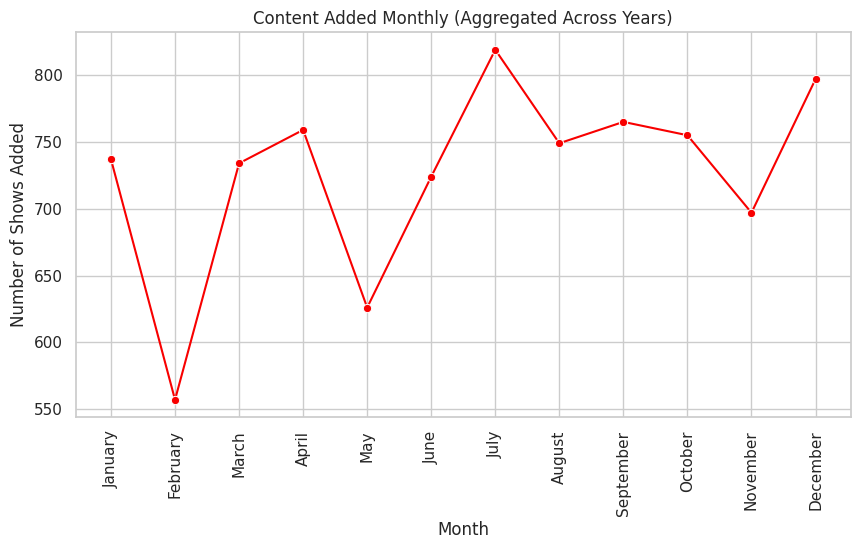

In [20]:
import calendar

# Ensure 'date_added' is in datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['Month'] = data['date_added'].dt.month
monthly_additions = data['Month'].value_counts().reindex(range(1, 13), fill_value=0)

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_additions.index, y=monthly_additions.values, marker='o', color='#f80000')
plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:13], rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Shows Added')
plt.title('Content Added Monthly (Aggregated Across Years)')
plt.grid(True)
plt.show()

# How many TV shows and movies are there per country?

                                             country     type  count
0                                  , France, Algeria    Movie      1
1                                      , South Korea  TV Show      1
2                                          Argentina    Movie     38
3                                          Argentina  TV Show     18
4  Argentina, Brazil, France, Poland, Germany, De...    Movie      1
5                                   Argentina, Chile    Movie      2
6                             Argentina, Chile, Peru    Movie      1
7                                  Argentina, France    Movie      1
8   Argentina, France, United States, Germany, Qatar    Movie      1
9                                   Argentina, Italy    Movie      1
            country     type  count
67           Canada    Movie    122
68           Canada  TV Show     59
184          France    Movie     75
185          France  TV Show     49
284           India    Movie    893
285           India  TV S

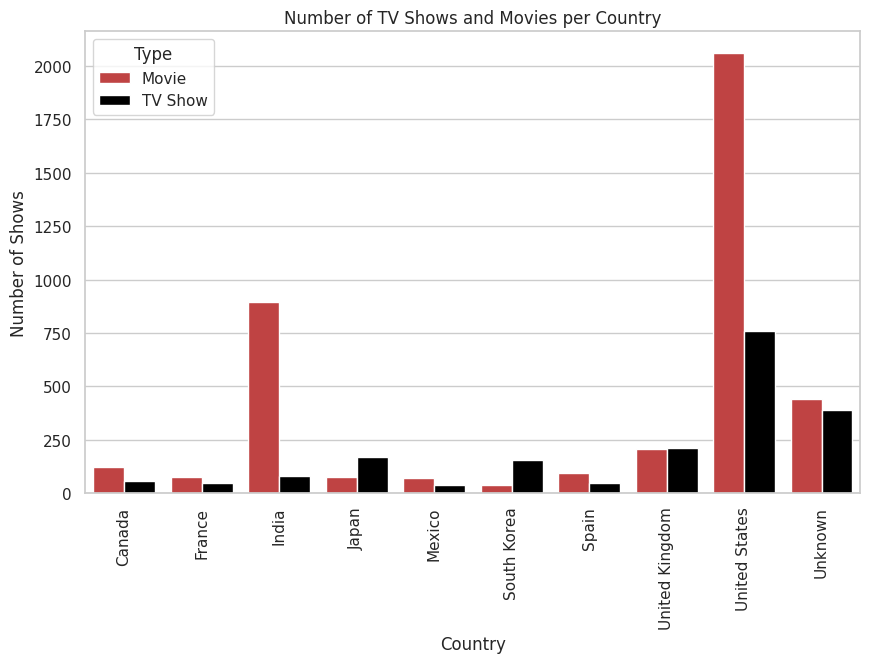

In [21]:
# Count the number of TV Shows and Movies per country
content_per_country = data.groupby(['country', 'type']).size().reset_index(name='count')
print(content_per_country.head(10))


top_countries = data['country'].value_counts().head(10).index
top_countries_content = content_per_country[content_per_country['country'].isin(top_countries)]
print(top_countries_content)

# Create a stacked bar chart
ax = sns.barplot(x='country', y='count', hue='type', data=top_countries_content)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Number of TV Shows and Movies per Country')
plt.legend(title='Type')
plt.show()

#  Age Ratings Distribution by Country

                                             country rating  count
0                                  , France, Algeria  TV-14      1
1                                      , South Korea  TV-MA      1
2                                          Argentina     NR      2
3                                          Argentina      R      1
4                                          Argentina  TV-14      7
5                                          Argentina   TV-G      2
6                                          Argentina  TV-MA     39
7                                          Argentina  TV-PG      3
8                                          Argentina   TV-Y      2
9  Argentina, Brazil, France, Poland, Germany, De...  TV-14      1
      country    rating  count
98     Canada         G      1
99     Canada     NC-17      1
100    Canada        NR      2
101    Canada        PG      8
102    Canada     PG-13      3
...       ...       ...    ...
1169  Unknown     TV-PG     90
1170  Unknown  

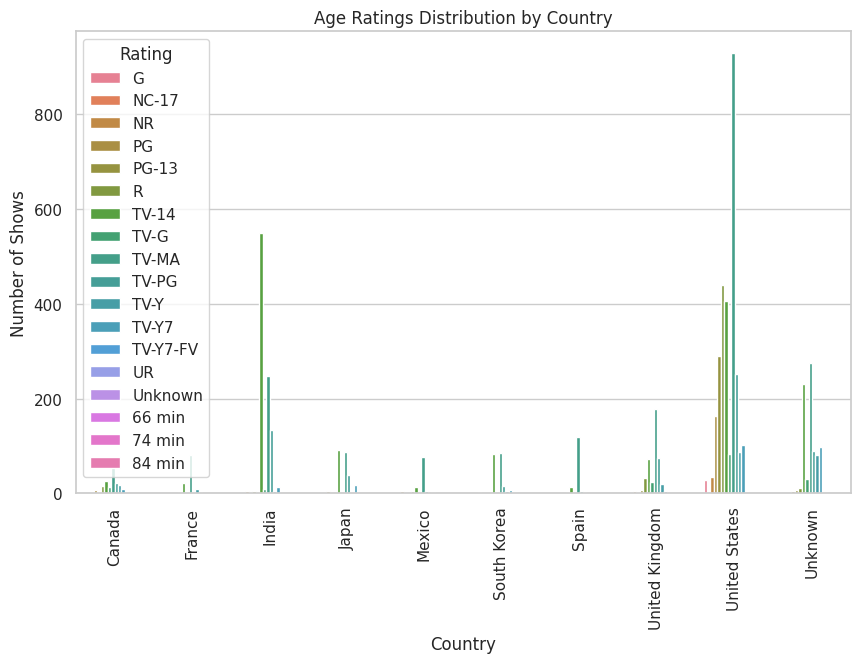

In [22]:
# Count the number of occurrences for each rating per country
age_ratings_per_country = data.groupby(['country', 'rating']).size().reset_index(name='count')
print(age_ratings_per_country.head(10))

top_countries = data['country'].value_counts().head(10).index
top_countries_ratings = age_ratings_per_country[age_ratings_per_country['country'].isin(top_countries)]
print(top_countries_ratings)

# Create a stacked bar chart
ax = sns.barplot(x='country', y='count', hue='rating', data=top_countries_ratings)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Age Ratings Distribution by Country')
plt.legend(title='Rating')
plt.show()

#Univariate: Numerical

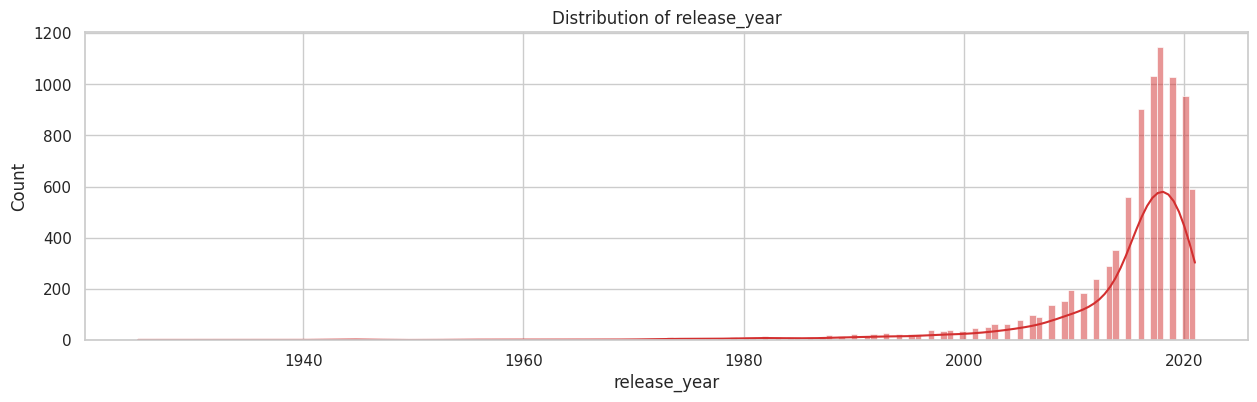

In [23]:
num = ['release_year']

for n in num:
  plt.figure(figsize=(15,4))
  sns.histplot(data[n], kde=True)
  plt.title(f'Distribution of {n}')
  plt.show()

#Release Year by Rating (Box Plot)


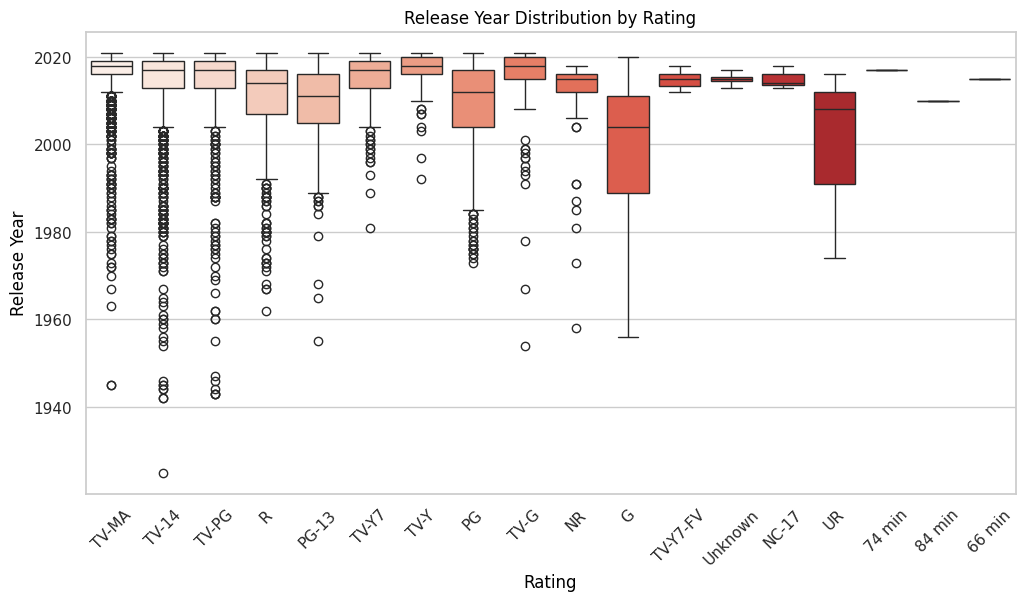

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="rating", y="release_year", palette="Reds", order=data['rating'].value_counts().index)
plt.title("Release Year Distribution by Rating", color=secondary)
plt.xlabel("Rating", color=secondary)
plt.ylabel("Release Year", color=secondary)
plt.xticks(rotation=45)
plt.show()


#Which directors produced atleast one movie in 2021?

In [29]:
movies_2021 = data[(data['type'] == 'Movie') & (data['release_year'] == 2021)]
director_counts = movies_2021['director'].value_counts()
top_10_directors = director_counts.head(10)

top_10_directors_df = pd.DataFrame({'director': top_10_directors.index, 'movie_count': top_10_directors.values})
print(top_10_directors_df)

                   director  movie_count
0                   Unknown           25
1       Rathindran R Prasad            4
2              Leigh Janiak            3
3              Keishi Otomo            2
4               Troy Miller            2
5             Prakash Satam            2
6                 Ben Simms            2
7  Chapman Way, Maclain Way            2
8             Bruno Garotti            2
9                 Joe Penna            1


# What is the average duration of a movie in the dataset?

In [31]:
# Convert 'duration' column to numeric (extracting only the number of minutes)
data['duration'] = data['duration'].astype(str)

data['duration_minutes'] = data['duration'].str.extract(r'(\d+)').astype(float)
movies = data[data['type'] == 'Movie']
average_duration = movies['duration_minutes'].mean()
print(f"Average Movie Duration: {average_duration:.2f} minutes")

Average Movie Duration: 99.53 minutes


# How many movies and TV shows are there for each rating category?

In [32]:
# Group by 'rating' and 'type', then count the occurrences
rating_counts = data.groupby(['rating', 'type']).size().unstack(fill_value=0)
rating_counts.columns = ['Movie_Count', 'TV_Show_Count']
print(rating_counts)

          Movie_Count  TV_Show_Count
rating                              
66 min              1              0
74 min              1              0
84 min              1              0
G                  41              0
NC-17               3              0
NR                 75              5
PG                287              0
PG-13             490              0
R                 797              2
TV-14            1427            733
TV-G              126             94
TV-MA            2062           1145
TV-PG             540            323
TV-Y              131            176
TV-Y7             139            195
TV-Y7-FV            5              1
UR                  3              0
Unknown             2              2


#Directors with Most Movies/TV Shows

In [37]:
# Count occurrences of each director
data_clean = data[data['director'].notna() & (data['director'] != 'Unknown')]
director_counts = data_clean['director'].value_counts()
top_10_directors = director_counts.head(10)
print(top_10_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


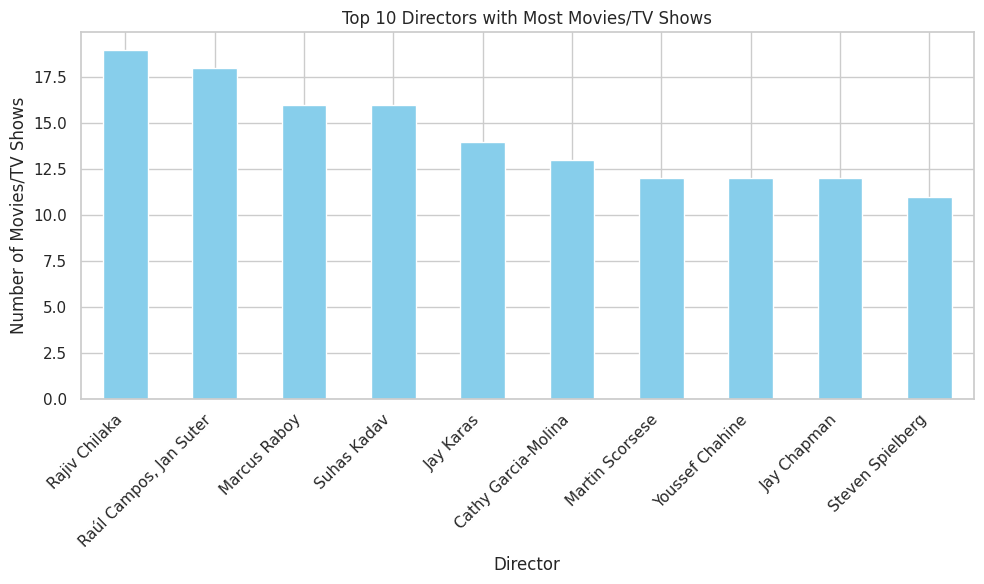

In [38]:
plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors with Most Movies/TV Shows')
plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()